# Preprocessing

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import contractions

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import balanced_accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Trifebi Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df_train = pd.read_csv("datasets/sms_train.csv")
df_train.head()

,label,message
0,0,I dont. Can you send it to me. Plus how's mode.
1,0,Or i go home first lar ü wait 4 me lor.. I put down my stuff first..
2,0,"Me, i dont know again oh"
3,0,"I'll see, but prolly yeah"
4,0,"Night has ended for another day, morning has come in a special way. May you smile like the sunny rays and leaves your worries at the blue blue bay. Gud mrng"


In [3]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['message'])
vocabulary = vectorizer.vocabulary_
features = list(vocabulary.keys())
num_features = len(features)
print("Number of features (unique words):", num_features)

Number of features (unique words): 7913


In [4]:
df_test = pd.read_csv("datasets/sms_test.csv")
df_test.head()

,message
0,"Yo, you at jp and hungry like a mofo?"
1,It's é only $140 ard...É rest all ard $180 at least...Which is é price 4 é 2 bedrm ($900)
2,"&lt;#&gt; , that's all? Guess that's easy enough"
3,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE JAN C THATS AL!!!!!!!!!
4,"Good afternoon sexy buns! How goes the job search ? I wake and you are my first thought as always, my love. I wish your fine and happy and know I adore you!"


## Case Folding

In [5]:
df_train['message'] = df_train['message'].str.lower()
df_train.head()

,label,message
0,0,i dont. can you send it to me. plus how's mode.
1,0,or i go home first lar ü wait 4 me lor.. i put down my stuff first..
2,0,"me, i dont know again oh"
3,0,"i'll see, but prolly yeah"
4,0,"night has ended for another day, morning has come in a special way. may you smile like the sunny rays and leaves your worries at the blue blue bay. gud mrng"


In [6]:
df_test['message'] = df_test['message'].str.lower()
df_test.head()

,message
0,"yo, you at jp and hungry like a mofo?"
1,it's é only $140 ard...é rest all ard $180 at least...which is é price 4 é 2 bedrm ($900)
2,"&lt;#&gt; , that's all? guess that's easy enough"
3,y?where u at dogbreath? its just sounding like jan c thats al!!!!!!!!!
4,"good afternoon sexy buns! how goes the job search ? i wake and you are my first thought as always, my love. i wish your fine and happy and know i adore you!"


## Cleansing/Punctuation Removal

In [7]:
def cleansing(messages):
  clean_message = re.sub('(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)','', messages)
  return clean_message

In [8]:
df_train['message'] = df_train['message'].apply(cleansing)
df_train.head()

,label,message
0,0,i dont can you send it to me plus hows mode
1,0,or i go home first lar wait me lor i put down my stuff first
2,0,me i dont know again oh
3,0,ill see but prolly yeah
4,0,night has ended for another day morning has come in a special way may you smile like the sunny rays and leaves your worries at the blue blue bay gud mrng


In [9]:
df_test['message'] = df_test['message'].apply(cleansing)
df_test.head()

,message
0,yo you at jp and hungry like a mofo
1,its only ard rest all ard at leastwhich is price bedrm
2,ltgt thats all guess thats easy enough
3,ywhere u at dogbreath its just sounding like jan c thats al
4,good afternoon sexy buns how goes the job search i wake and you are my first thought as always my love i wish your fine and happy and know i adore you


## Normalization

In [10]:
def normalize(messages):
  return contractions.fix(messages)

In [11]:
df_train['message'] = df_train['message'].apply(normalize)
df_train.head()

,label,message
0,0,i do not can you send it to me plus how is mode
1,0,or i go home first lar wait me lor i put down my stuff first
2,0,me i do not know again oh
3,0,ill see but probably yeah
4,0,night has ended for another day morning has come in a special way may you smile like the sunny rays and leaves your worries at the blue blue bay gud mrng


In [12]:
df_test['message'] = df_test['message'].apply(normalize)
df_test.head()

,message
0,yo you at jp and hungry like a mofo
1,its only ard rest all ard at leastwhich is price bedrm
2,ltgt that is all guess that is easy enough
3,ywhere you at dogbreath its just sounding like jan c that is al
4,good afternoon sexy buns how goes the job search i wake and you are my first thought as always my love i wish your fine and happy and know i adore you


## Tokenization

In [13]:
def tokenize(messages):
    return word_tokenize(messages)

In [14]:
df_train['message'] = df_train['message'].apply(tokenize)
df_train.head()

,label,message
0,0,"[i, do, not, can, you, send, it, to, me, plus, how, is, mode]"
1,0,"[or, i, go, home, first, lar, wait, me, lor, i, put, down, my, stuff, first]"
2,0,"[me, i, do, not, know, again, oh]"
3,0,"[ill, see, but, probably, yeah]"
4,0,"[night, has, ended, for, another, day, morning, has, come, in, a, special, way, may, you, smile, like, the, sunny, rays, and, leaves, your, worries, at, the, blue, blue, bay, gud, mrng]"


In [15]:
df_test['message'] = df_test['message'].apply(tokenize)
df_test.head()

,message
0,"[yo, you, at, jp, and, hungry, like, a, mofo]"
1,"[its, only, ard, rest, all, ard, at, leastwhich, is, price, bedrm]"
2,"[ltgt, that, is, all, guess, that, is, easy, enough]"
3,"[ywhere, you, at, dogbreath, its, just, sounding, like, jan, c, that, is, al]"
4,"[good, afternoon, sexy, buns, how, goes, the, job, search, i, wake, and, you, are, my, first, thought, as, always, my, love, i, wish, your, fine, and, happy, and, know, i, adore, you]"


## Stopword Removal

In [16]:
def stop_removal(messages):
  words = stopwords.words('english')
  words = set(words)
  return [word for word in messages if word not in words]

In [17]:
df_train['message']  = df_train['message'] .apply(stop_removal)
df_train.head()

,label,message
0,0,"[send, plus, mode]"
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]"
2,0,"[know, oh]"
3,0,"[ill, see, probably, yeah]"
4,0,"[night, ended, another, day, morning, come, special, way, may, smile, like, sunny, rays, leaves, worries, blue, blue, bay, gud, mrng]"


In [18]:
df_test['message']  = df_test['message'] .apply(stop_removal)
df_test.head()

,message
0,"[yo, jp, hungry, like, mofo]"
1,"[ard, rest, ard, leastwhich, price, bedrm]"
2,"[ltgt, guess, easy, enough]"
3,"[ywhere, dogbreath, sounding, like, jan, c, al]"
4,"[good, afternoon, sexy, buns, goes, job, search, wake, first, thought, always, love, wish, fine, happy, know, adore]"


## Lemmatization

In [19]:
def lemmatize_pos(words, pos):
  lemmatizer = WordNetLemmatizer()
  
  pos_mapping = {
      'N': 'n',
        'V': 'v',
        'R': 'r',
        'J': 'a'
  }

  wordnet_pos = pos_mapping.get(pos[0], 'n')
  if wordnet_pos == 'n':
    return lemmatizer.lemmatize(words, pos='v')
  return lemmatizer.lemmatize(words, pos=wordnet_pos)

In [20]:
df_train['message']  = df_train['message'] .apply(lambda x: [lemmatize_pos(words, pos) for words, pos in pos_tag(x)])
df_train.head()

,label,message
0,0,"[send, plus, mode]"
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]"
2,0,"[know, oh]"
3,0,"[ill, see, probably, yeah]"
4,0,"[night, end, another, day, morning, come, special, way, may, smile, like, sunny, ray, leave, worry, blue, blue, bay, gud, mrng]"


In [21]:
all_tokens = [token for sentence in df_train['message'] for token in sentence]
num_features = len(set(all_tokens))
print("Number of features (unique words):", num_features)

Number of features (unique words): 6784


In [22]:
df_test['message']  = df_test['message'] .apply(lambda x: [lemmatize_pos(words, pos) for words, pos in pos_tag(x)])
df_test.head()

,message
0,"[yo, jp, hungry, like, mofo]"
1,"[ard, rest, ard, leastwhich, price, bedrm]"
2,"[ltgt, guess, easy, enough]"
3,"[ywhere, dogbreath, sound, like, jan, c, al]"
4,"[good, afternoon, sexy, buns, go, job, search, wake, first, think, always, love, wish, fine, happy, know, adore]"


# TF-IDF

In [23]:
def join_text_list(texts):
    return ' '.join([text for text in texts])

In [24]:
df_train["final message"] = df_train["message"].apply(join_text_list)
df_train.head()

,label,message,final message
0,0,"[send, plus, mode]",send plus mode
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]",go home first lar wait lor put stuff first
2,0,"[know, oh]",know oh
3,0,"[ill, see, probably, yeah]",ill see probably yeah
4,0,"[night, end, another, day, morning, come, special, way, may, smile, like, sunny, ray, leave, worry, blue, blue, bay, gud, mrng]",night end another day morning come special way may smile like sunny ray leave worry blue blue bay gud mrng


In [25]:
df_test["final message"] = df_test["message"].apply(join_text_list)
df_test.head()

,message,final message
0,"[yo, jp, hungry, like, mofo]",yo jp hungry like mofo
1,"[ard, rest, ard, leastwhich, price, bedrm]",ard rest ard leastwhich price bedrm
2,"[ltgt, guess, easy, enough]",ltgt guess easy enough
3,"[ywhere, dogbreath, sound, like, jan, c, al]",ywhere dogbreath sound like jan c al
4,"[good, afternoon, sexy, buns, go, job, search, wake, first, think, always, love, wish, fine, happy, know, adore]",good afternoon sexy buns go job search wake first think always love wish fine happy know adore


In [26]:
tf_idf_train = TfidfVectorizer(binary=True)
tfidf_mat_train = tf_idf_train.fit_transform(df_train["final message"]).toarray()
tfidf_train = pd.DataFrame(tfidf_mat_train, columns=tf_idf_train.get_feature_names_out())

In [27]:
tf_idf_test = TfidfVectorizer(binary=True)
tfidf_mat_test = tf_idf_test.fit_transform(df_test["final message"]).toarray()
tfidf_test = pd.DataFrame(tfidf_mat_test, columns=tf_idf_test.get_feature_names_out())

In [28]:
df = np.sum(tfidf_train > 0, axis=0)
threshold = 0.002 * tfidf_train.shape[0]
tfidf_train = tfidf_train.loc[:, df > threshold]
indexes = [el for el in tfidf_train.columns.values if el in tfidf_test.columns.values]
tfidf_train = tfidf_train.loc[:, indexes]

tfidf_train.head()

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.525276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
tfidf_test = tfidf_test.loc[:, tfidf_train.columns.values]
tfidf_test.head()

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400931,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [30]:
X = tfidf_train
X[0:5]

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.525276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y = df_train['label']
y

0       0
1       0
2       0
3       0
4       0
       ..
4567    0
4568    1
4569    0
4570    0
4571    0
Name: label, Length: 4572, dtype: int64

# Train Validation Split

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y,
    test_size=0.2,
    shuffle=True,
)

In [33]:
print("Train set: ", X_train.shape, y_train.shape)
print("Validation set: ", X_valid.shape, y_valid.shape)

Train set:  (3657, 624) (3657,)
Validation set:  (915, 624) (915,)


# Feature selection

## Method 1 - Fisher Information

In [34]:
# all methods
def high_correlation(X_train, t):
    print("high_correlation")
    
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > t)]
    X_train.drop(to_drop, axis=1, inplace=True)
    return X_train

def information_gain(X_train, y_train, t):
    print("information_gain")

    importance = mutual_info_classif(X_train, y_train)
    return X_train.loc[:, importance > np.quantile(importance, t)]

In [35]:
# method 1
def fisher_score(X_train, y_train, t):
    print("fisher_score")
    chi2_selector = SelectKBest(chi2, k=t)
    chi2_selector.fit(X_train, y_train)

    return X_train.loc[:, chi2_selector.get_support()]

# method 2
def recursive_feature_eliminator(X_train, y_train, t):
    print("recursive_feature_eliminator")

    model = XGBClassifier()
    rfe = RFE(estimator=model, n_features_to_select=t, step=1)
    rfe.fit(X_train, y_train)
    return X_train.loc[:, rfe.get_support()]

# method 3
def select_from_model(X_train, y_train, t):
    print("select_from_model")

    sfm = SelectFromModel(XGBClassifier(n_estimators=100), max_features=t)
    sfm.fit(X_train, y_train)
    return X_train.loc[:, sfm.get_support()]

# method 4
def logistic_regression_l1(X_train, y_train, t):
    print("logistic_regression_l1")

    sfm = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000))
    sfm.fit(X_train, y_train)
    return X_train.iloc[:, sfm.get_support()]

In [36]:
def feature_selection_method1(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
}
X_train_t, X_test_t = feature_selection_method1(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 624

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

Words left: ['claim' 'free' 'mobile' 'prize' 'txt']
Accuracy train: 0.7799
Accuracy valid: 0.7332


In [37]:
ffss = list(range(100, 121, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method1(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method1/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method1/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 100

Words left: ['ampm' 'anything' 'attempt' 'await' 'award' 'box' 'call' 'camera' 'cash'
 'chance' 'charge' 'chat' 'claim' 'club' 'code' 'colour' 'contact'
 'content' 'cost' 'credit' 'cs' 'customer' 'da' 'date' 'delivery' 'direct'
 'draw' 'eg' 'expire' 'final' 'free' 'game' 'go' 'guarantee' 'hey'
 'holiday' 'hot' 'info' 'information' 'know' 'land' 'landline' 'late'
 'leave' 'line' 'live' 'lor' 'ltd' 'ltgt' 'match' 'message' 'mins' 'mob'
 'mobile' 'mths' 'nd' 'network' 'new' 'nokia' 'offer' 'oh' 'order' 'per'
 'phone' 'play' 'please' 'pmin' 'pmsg' 'pobox' 'pound' 'ppm' 'price'
 'prize' 'receive' 'reply' 'ringtone' 'say' 'send' 'service' 'sexy' 'show'
 'single' 'st' 'stop' 'tc' 'tcs' 'text' 'todays' 'tone' 'tscs' 'txt'
 'txting' 'txts' 'urgent' 'video' 'weekly' 'win' 'wk' 'worth' 'yr']
Accuracy train: 0.9458
Accuracy valid: 0.8992
Features initial: 623

high_corr

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 103

Words left: ['account' 'ampm' 'attempt' 'award' 'bonus' 'call' 'camera' 'chance'
 'claim' 'code' 'collect' 'collection' 'congratulations' 'contact'
 'credit' 'da' 'date' 'dog' 'draw' 'eg' 'either' 'etc' 'every' 'expire'
 'final' 'free' 'game' 'go' 'good' 'guarantee' 'home' 'hot' 'hrs' 'know'
 'land' 'landline' 'late' 'line' 'live' 'love' 'match' 'mins' 'mob'
 'mobile' 'mobileupd' 'music' 'nd' 'need' 'network' 'new' 'nokia' 'number'
 'offer' 'ok' 'operator' 'order' 'per' 'phone' 'pics' 'please' 'pmin'
 'pobox' 'pound' 'ppm' 'prize' 'rate' 'really' 'receive' 'reply'
 'ringtone' 'send' 'service' 'show' 'single' 'sleep' 'sms' 'sorry' 'stop'
 'tc' 'tcs' 'text' 'todays' 'tone' 'top' 'tscs' 'txt' 'txting' 'uk'
 'update' 'urgent' 'valid' 'value' 'video' 'vouchers' 'week' 'weeks' 'win'
 'wkly' 'work' 'worth' 'xmas' 'yeah' 'yr']
Accuracy train: 0.9425
Accuracy valid: 

Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 105

Words left: ['apply' 'attempt' 'auction' 'award' 'box' 'call' 'camcorder' 'cash'
 'chance' 'chat' 'claim' 'club' 'collect' 'collection' 'contact' 'content'
 'cos' 'cost' 'credit' 'cs' 'date' 'double' 'draw' 'easy' 'eg' 'either'
 'enter' 'entry' 'expire' 'follow' 'free' 'game' 'gift' 'gr' 'guarantee'
 'help' 'holiday' 'home' 'hrs' 'ill' 'information' 'invite' 'join' 'later'
 'line' 'ltd' 'ltgt' 'luck' 'message' 'mins' 'mobile' 'mobileupd' 'music'
 'need' 'network' 'new' 'news' 'nokia' 'offer' 'oh' 'ok' 'orange' 'order'
 'per' 'phone' 'play' 'please' 'plus' 'pmin' 'pobox' 'poly' 'ppm' 'price'
 'prize' 'receive' 'reply' 'ringtone' 'sae' 'say' 'select' 'send'
 'service' 'st' 'stop' 'tc' 'tcs' 'term' 'text' 'todays' 'tone' 'txt'
 'txts' 'urgent' 'valid' 'visit' 'voucher' 'watch' 'way' 'week' 'weekly'
 'weeks' 'win' 'word' 'work' 'yr']
Accuracy train: 0.943
Accuracy valid: 0.9109
Features initial: 623



Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 108

Words left: ['apply' 'award' 'box' 'buy' 'call' 'caller' 'camcorder' 'camera' 'cash'
 'chance' 'charge' 'claim' 'class' 'club' 'collection' 'colour' 'contact'
 'cost' 'cs' 'customer' 'direct' 'draw' 'dun' 'either' 'every' 'final'
 'free' 'freemsg' 'go' 'gr' 'guarantee' 'happy' 'home' 'hot' 'hrs' 'ill'
 'info' 'late' 'live' 'long' 'ltd' 'message' 'mins' 'minute' 'mob'
 'mobile' 'mobiles' 'mobileupd' 'much' 'music' 'new' 'nokia' 'number'
 'offer' 'operator' 'optout' 'orange' 'order' 'per' 'phone' 'please'
 'pmsg' 'pobox' 'pound' 'ppm' 'price' 'princess' 'prize' 'quiz' 'rate'
 'real' 'really' 'receive' 'reply' 'ringtone' 'select' 'send' 'service'
 'sexy' 'show' 'single' 'sms' 'sorry' 'st' 'stop' 'tc' 'term' 'text'
 'texts' 'time' 'todays' 'tone' 'tscs' 'txt' 'unsubscribe' 'update'
 'urgent' 'valid' 'value' 'video' 'voucher' 'vouchers' 'week' 'weekly'
 'weeks' '

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 111

Words left: ['account' 'always' 'amp' 'ampm' 'anything' 'apply' 'attempt' 'auction'
 'award' 'box' 'call' 'camcorder' 'camera' 'cash' 'chance' 'charge' 'chat'
 'claim' 'code' 'collect' 'colour' 'come' 'congratulations' 'contact'
 'content' 'customer' 'da' 'date' 'direct' 'double' 'draw' 'dun' 'either'
 'every' 'feel' 'free' 'freemsg' 'frnd' 'game' 'gift' 'go' 'guarantee'
 'holiday' 'home' 'hrs' 'info' 'information' 'land' 'late' 'later' 'let'
 'live' 'love' 'ltgt' 'mob' 'mobile' 'mobiles' 'mobileupd' 'morning'
 'music' 'new' 'news' 'nice' 'nokia' 'offer' 'opt' 'orange' 'per' 'phone'
 'play' 'please' 'plus' 'pmin' 'pmsg' 'po' 'pobox' 'poly' 'ppm' 'prize'
 'real' 'receive' 'reply' 'ringtone' 'sae' 'select' 'send' 'service'
 'sleep' 'st' 'stop' 'tc' 'tcs' 'text' 'though' 'time' 'tomorrow' 'tone'
 'txt' 'txts' 'urgent' 'valid' 'voucher' 'vouchers' 'wake' 'watch'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 113

Words left: ['age' 'anytime' 'apply' 'attempt' 'await' 'award' 'bonus' 'box' 'call'
 'camera' 'cash' 'chance' 'charge' 'chat' 'claim' 'club' 'code' 'collect'
 'collection' 'congrats' 'contact' 'content' 'cost' 'cs' 'customer' 'date'
 'dog' 'draw' 'end' 'entry' 'every' 'fantasy' 'final' 'free' 'frnd' 'good'
 'guarantee' 'hrs' 'ill' 'information' 'join' 'landline' 'late' 'let'
 'like' 'line' 'live' 'ltd' 'luck' 'message' 'mins' 'mob' 'mobile'
 'mobiles' 'mobileupd' 'music' 'nd' 'need' 'network' 'new' 'nokia'
 'number' 'oh' 'ok' 'opt' 'orange' 'per' 'play' 'please' 'pmsg' 'po'
 'pobox' 'poly' 'pound' 'ppm' 'price' 'prize' 'rate' 'receive' 'reply'
 'ringtone' 'sae' 'send' 'service' 'show' 'sms' 'sorry' 'st' 'stop' 'tc'
 'tcs' 'text' 'texts' 'time' 'tone' 'tscs' 'txt' 'txting' 'txts' 'uk'
 'unsubscribe' 'urgent' 'valid' 'vouchers' 'week' 'weekly' 'weeks' 'win'
 '

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 116

Words left: ['ampm' 'anytime' 'auction' 'award' 'bonus' 'box' 'call' 'cash' 'chance'
 'charge' 'chat' 'choose' 'claim' 'code' 'collect' 'collection' 'colour'
 'come' 'congrats' 'congratulations' 'contact' 'cs' 'customer' 'delivery'
 'direct' 'download' 'draw' 'eat' 'enter' 'entry' 'every' 'fancy'
 'fantasy' 'feel' 'free' 'go' 'guarantee' 'happy' 'hrs' 'ill' 'important'
 'info' 'information' 'land' 'landline' 'late' 'live' 'long' 'love'
 'match' 'mean' 'message' 'mins' 'mob' 'mobile' 'mobiles' 'mths' 'music'
 'nd' 'network' 'new' 'nokia' 'offer' 'oh' 'operator' 'opt' 'optout'
 'orange' 'per' 'phone' 'please' 'pmin' 'pmsg' 'po' 'pobox' 'pound' 'ppm'
 'princess' 'prize' 'quiz' 'rate' 'real' 'reply' 'ringtone' 'saturday'
 'select' 'send' 'service' 'sex' 'show' 'sms' 'stop' 'tc' 'text' 'texts'
 'time' 'todays' 'tone' 'top' 'tscs' 'txt' 'txts' 'unsubscribe' 'updat

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 119

Words left: ['already' 'anytime' 'attempt' 'await' 'award' 'bite' 'bonus' 'box' 'call'
 'camcorder' 'camera' 'cash' 'chance' 'chat' 'claim' 'club' 'code'
 'collect' 'congratulations' 'contact' 'content' 'cost' 'cs' 'customer'
 'date' 'delivery' 'discount' 'dog' 'draw' 'enter' 'entry' 'every'
 'fantasy' 'feel' 'free' 'frnd' 'gift' 'go' 'guarantee' 'gud' 'help' 'hot'
 'hrs' 'information' 'join' 'landline' 'late' 'let' 'liao' 'live' 'lol'
 'long' 'lor' 'ltd' 'lunch' 'match' 'mean' 'message' 'mins' 'miss' 'mob'
 'mobile' 'mobileupd' 'morning' 'music' 'nd' 'new' 'nice' 'nokia' 'offer'
 'ok' 'okie' 'opt' 'orange' 'per' 'phone' 'pic' 'play' 'player' 'please'
 'pmin' 'pmsg' 'po' 'pobox' 'prize' 'quiz' 'rate' 'really' 'reply'
 'ringtone' 'sae' 'say' 'send' 'service' 'sex' 'show' 'sleep' 'stop' 'tcs'
 'tell' 'text' 'texts' 'thing' 'thk' 'though' 'time' 'todays' 'tone'

## Method 2 - Recursive Feature Elimination

In [147]:
def feature_selection_method2(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = recursive_feature_eliminator(X_train_t, y_train, settings["recursive_feature_eliminator"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 30,
    "recursive_feature_eliminator": 3,
}
X_train_t, X_test_t = feature_selection_method2(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 3

Words left: ['claim' 'prize' 'tone']
Accuracy train: 0.6393
Accuracy valid: 0.6061


In [149]:
ffss = list(range(100, 121, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 150,
            "recursive_feature_eliminator": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method2(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)


        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method2/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method2/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 100

Words left: ['amp' 'apply' 'auction' 'await' 'award' 'boy' 'call' 'caller' 'camera'
 'care' 'cash' 'chance' 'charge' 'chat' 'claim' 'club' 'code' 'collection'
 'college' 'colour' 'contact' 'cos' 'dad' 'decide' 'delivery' 'den' 'etc'
 'even' 'every' 'fancy' 'free' 'game' 'go' 'guarantee' 'hand' 'hello'
 'holiday' 'hop' 'hour' 'info' 'information' 'join' 'kiss' 'know' 'land'
 'laptop' 'late' 'leave' 'lesson' 'let' 'lor' 'love' 'ltd' 'make'
 'message' 'mins' 'mob' 'mobile' 'need' 'network' 'new' 'next' 'nokia'
 'number' 'phone' 'please' 'pobox' 'prize' 'rate' 'receive' 'reply'
 'ringtone' 'room' 'send' 'service' 'shall' 'show' 'sms' 'sorry' 'stop'
 'tell' 'text' 'todays' 'tomorrow' 'tone' 'top' 'try' 'tscs' 'txt'
 'unsubscribe' 'urgent' 'valid' 'video' 'wan' 'week' 'weekly' 'win'
 'winner' 'wish' 'word']
Accuracy

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 102

Words left: ['also' 'always' 'amp' 'anything' 'anytime' 'apply' 'attempt' 'auction'
 'award' 'awesome' 'box' 'brother' 'call' 'caller' 'camcorder' 'camera'
 'case' 'cash' 'catch' 'chance' 'charge' 'chat' 'claim' 'collection'
 'come' 'contact' 'credit' 'date' 'draw' 'fancy' 'free' 'go' 'guarantee'
 'gud' 'hav' 'hee' 'hello' 'hmm' 'holiday' 'hot' 'hrs' 'information' 'job'
 'jus' 'know' 'landline' 'lar' 'late' 'let' 'lor' 'ltgt' 'message' 'mins'
 'miss' 'mob' 'mobile' 'need' 'network' 'new' 'next' 'nokia' 'offer' 'per'
 'phone' 'pic' 'pics' 'plan' 'play' 'please' 'plus' 'pmin' 'pmsg' 'poly'
 'prize' 'receive' 'reply' 'ringtone' 'say' 'send' 'service' 'still'
 'stop' 'text' 'tone' 'try' 'txt' 'urgent' 'valid' 'wan' 'wat' 'way'
 'week' 'weekend' 'weekly' 'well' 'wil' 'win' 'wish' 'wkly' 'write' 'xmas'
 'xxx']
Accur

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 105

Words left: ['amp' 'apply' 'ard' 'around' 'attempt' 'await' 'award' 'awesome' 'babe'
 'bed' 'box' 'call' 'camera' 'chance' 'chat' 'claim' 'code' 'colour'
 'come' 'congrats' 'contact' 'cool' 'cos' 'credit' 'customer' 'day'
 'detail' 'discount' 'dog' 'draw' 'everything' 'free' 'go' 'great'
 'guarantee' 'haf' 'haha' 'hair' 'help' 'hope' 'information' 'landline'
 'line' 'ltd' 'ltdecimalgt' 'ltgt' 'march' 'message' 'mins' 'minute' 'mob'
 'mobile' 'new' 'nokia' 'number' 'offer' 'okie' 'operator' 'opt' 'per'
 'pic' 'pics' 'play' 'pls' 'po' 'pobox' 'pound' 'ppm' 'prize' 'read'
 'really' 'receive' 'reply' 'ringtone' 'run' 'sae' 'say' 'see' 'send'
 'service' 'st' 'stop' 'sure' 'tell' 'term' 'text' 'texts' 'thing' 'think'
 'time' 'todays' 'tone' 'tot' 'try' 'txt' 'urgent' 'valid' 'voucher'
 'vouchers' 'week' 'weekly' 'we

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 108

Words left: ['apply' 'attempt' 'award' 'babe' 'box' 'call' 'camcorder' 'cash' 'chance'
 'charge' 'chat' 'choose' 'claim' 'class' 'club' 'code' 'collection'
 'come' 'congratulations' 'contact' 'cos' 'cost' 'credit' 'customer'
 'different' 'draw' 'free' 'go' 'great' 'guarantee' 'happy' 'head' 'home'
 'hope' 'ill' 'important' 'job' 'know' 'land' 'lar' 'leh' 'lesson' 'line'
 'ltd' 'ltgt' 'luck' 'match' 'message' 'mins' 'mobile' 'much' 'network'
 'new' 'nokia' 'ok' 'per' 'phone' 'play' 'please' 'pls' 'pmsg' 'pobox'
 'ppm' 'prize' 'receive' 'reply' 'ringtone' 'say' 'see' 'send' 'service'
 'show' 'sit' 'sorry' 'stay' 'stop' 'store' 'suppose' 'sweet' 'take' 'tc'
 'tcs' 'text' 'think' 'thk' 'though' 'tone' 'try' 'txt' 'unsubscribe'
 'update' 'urgent' 'valid' 'voucher' 'vouchers' 'wake' 'wat' 'watch'
 'week' 'weekly' 'w

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 110

Words left: ['amp' 'ampm' 'anything' 'ard' 'ask' 'attempt' 'award' 'bed' 'bill'
 'bonus' 'box' 'buy' 'call' 'caller' 'camcorder' 'camera' 'care' 'cash'
 'chance' 'claim' 'class' 'code' 'contact' 'cost' 'date' 'draw' 'drive'
 'eat' 'every' 'free' 'go' 'good' 'guarantee' 'happy' 'hear' 'help' 'hey'
 'hot' 'hurt' 'ill' 'important' 'info' 'job' 'join' 'landline' 'late'
 'like' 'line' 'live' 'love' 'ltd' 'make' 'message' 'mins' 'mobile'
 'morning' 'need' 'network' 'new' 'nokia' 'number' 'oh' 'operator' 'pass'
 'per' 'phone' 'plan' 'play' 'please' 'pmin' 'pmsg' 'pobox' 'pound' 'ppm'
 'prize' 'reply' 'ringtone' 'sae' 'send' 'service' 'sex' 'show' 'sms'
 'stop' 'sure' 'sweet' 'tcs' 'test' 'text' 'texts' 'time' 'tone' 'try'
 'txt' 'update' 'urgent' 'video' 'visit' 'watch' 'week' 'weekly' 'weeks'
 'welcome' 'well' 'win'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 113

Words left: ['account' 'actually' 'aft' 'afternoon' 'alright' 'anything' 'attempt'
 'auction' 'await' 'award' 'awesome' 'bite' 'bonus' 'box' 'call' 'caller'
 'camera' 'car' 'cash' 'chance' 'charge' 'chat' 'claim' 'class' 'club'
 'code' 'collect' 'contact' 'cost' 'credit' 'da' 'days' 'direct' 'double'
 'download' 'draw' 'drive' 'family' 'fancy' 'fantasy' 'food' 'free' 'game'
 'guarantee' 'haf' 'haha' 'happy' 'head' 'hope' 'hrs' 'hurt' 'info'
 'information' 'jus' 'know' 'landline' 'late' 'ltgt' 'match' 'message'
 'mins' 'mob' 'mobile' 'mobileupd' 'music' 'name' 'new' 'nokia' 'number'
 'offer' 'okie' 'operator' 'optout' 'orange' 'order' 'per' 'phone'
 'please' 'pmsg' 'pobox' 'pound' 'ppm' 'prize' 'rate' 'receive' 'reply'
 'ringtone' 'say' 'send' 'service' 'sms' 'stop' 'sweet' 'tcs' 'text'
 'texts' 'think' 'til' '

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 116

Words left: ['amp' 'anyway' 'around' 'attempt' 'await' 'award' 'bill' 'bonus' 'box'
 'boytoy' 'call' 'caller' 'camcorder' 'cash' 'chance' 'charge' 'chat'
 'claim' 'code' 'collect' 'collection' 'colour' 'congrats'
 'congratulations' 'contact' 'cost' 'cs' 'customer' 'date' 'draw' 'entry'
 'etc' 'fancy' 'free' 'game' 'go' 'good' 'great' 'guarantee' 'happen'
 'hello' 'hes' 'hey' 'holiday' 'home' 'hot' 'house' 'huh' 'ill' 'info'
 'join' 'land' 'landline' 'leave' 'like' 'log' 'ltgt' 'make' 'message'
 'mins' 'mob' 'mobile' 'mobiles' 'mobileupd' 'music' 'name' 'network'
 'new' 'nokia' 'number' 'oh' 'per' 'phone' 'please' 'pmin' 'pmsg' 'pobox'
 'poly' 'pound' 'ppm' 'prize' 'rate' 'reply' 'right' 'ringtone' 'select'
 'send' 'service' 'sleep' 'smile' 'sms' 'st' 'still' 'stop' 'story' 'text'
 'thanx' 'think' 'time' 'tone'

Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 118

Words left: ['apply' 'ask' 'attempt' 'await' 'award' 'birthday' 'box' 'call'
 'camcorder' 'camera' 'card' 'cash' 'chance' 'charge' 'chat' 'choose'
 'claim' 'class' 'club' 'code' 'collection' 'colour' 'come' 'contact'
 'cost' 'credit' 'cs' 'customer' 'da' 'day' 'den' 'direct' 'download'
 'draw' 'else' 'email' 'end' 'enter' 'find' 'free' 'go' 'good' 'great'
 'guarantee' 'info' 'invite' 'job' 'join' 'landline' 'line' 'ltgt' 'lucky'
 'mail' 'many' 'mean' 'message' 'mins' 'mobile' 'much' 'need' 'new'
 'nokia' 'offer' 'ok' 'one' 'operator' 'optout' 'order' 'pain' 'per'
 'phone' 'plan' 'please' 'pm' 'pmin' 'pmsg' 'po' 'pobox' 'pound' 'prize'
 'problem' 'receive' 'remember' 'reply' 'ringtone' 'room' 'sae' 'saw'
 'select' 'send' 'service' 'sorry' 'still' 'stop' 'sweet' 'tc' 'tcs'
 'text' 'things' 'tone' 'tscs' 'txt' 'txting' 'urgent' 'valid' 'value'
 'video'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

recursive_feature_eliminator
Features left: 120

Words left: ['amp' 'anyway' 'apply' 'around' 'attempt' 'await' 'award' 'bed' 'bill'
 'bonus' 'box' 'call' 'camera' 'cash' 'chance' 'chat' 'choose' 'claim'
 'class' 'club' 'code' 'collection' 'colour' 'congrats' 'contact' 'cool'
 'cos' 'cost' 'cs' 'da' 'date' 'day' 'dog' 'draw' 'dun' 'easy' 'free' 'go'
 'guarantee' 'gym' 'hes' 'holiday' 'hurt' 'ill' 'important' 'info' 'job'
 'kiss' 'land' 'late' 'leave' 'lei' 'lesson' 'line' 'live' 'log' 'lor'
 'love' 'message' 'mins' 'mob' 'mobile' 'mobileupd' 'mths' 'much' 'music'
 'new' 'nokia' 'offer' 'ok' 'okay' 'pa' 'pain' 'per' 'phone' 'play' 'po'
 'pobox' 'ppm' 'prize' 'rate' 'read' 'really' 'reply' 'ringtone' 'see'
 'select' 'send' 'service' 'sex' 'shall' 'show' 'sms' 'still' 'stop'
 'sure' 'term' 'text' 'texts' 'think' 'tomo' 'tomorrow' 'tone' 'top' 'try'
 'txt' 'txts

# Method 3 - Select Most Important from XGBoost

In [150]:
def feature_selection_method3(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = select_from_model(X_train_t, y_train, settings["select_from_model"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "select_from_model": 3,
}
X_train_t, X_test_t = feature_selection_method3(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

select_from_model
Features left: 2

Words left: ['claim' 'prize']
Accuracy train: 0.5946
Accuracy valid: 0.5871


In [151]:
ffss = list(range(100, 121, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 150,
            "select_from_model": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method3(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method3/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method3/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 42

Words left: ['apply' 'await' 'award' 'box' 'call' 'cash' 'chat' 'claim' 'club'
 'contact' 'cos' 'date' 'dog' 'draw' 'free' 'guarantee' 'information'
 'mins' 'mob' 'mobile' 'new' 'nokia' 'per' 'pmin' 'pmsg' 'pobox' 'pound'
 'ppm' 'prize' 'reply' 'ringtone' 'service' 'stop' 'term' 'text' 'tone'
 'txt' 'urgent' 'video' 'weeks' 'win' 'work']
Accuracy train: 0.9408
Accuracy valid: 0.8768
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 42

Words left: ['apply' 'await' 'award' 'box' 'call' 'cash' 'chat' 'claim' 'club' 'code'
 'contact' 'draw' 'free' 'go' 'ltgt' 'message' 'mins' 'mob' 'mobile' 'new'
 'nokia' 'number' 'per' 'please' 'pmin' 'pmsg' 'pobox' 'pound' 'prize'
 'problem' 'receive' 'reply' 'ringtone' 'send' '

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 45

Words left: ['apply' 'await' 'award' 'box' 'call' 'cash' 'chat' 'claim' 'club' 'code'
 'contact' 'date' 'draw' 'free' 'guarantee' 'ill' 'important' 'message'
 'mins' 'miss' 'mob' 'mobile' 'new' 'nokia' 'per' 'please' 'pmin' 'pmsg'
 'pobox' 'pound' 'prize' 'reply' 'ringtone' 'send' 'service' 'stop' 'tell'
 'text' 'tone' 'txt' 'urgent' 'weeks' 'well' 'win' 'work']
Accuracy train: 0.9486
Accuracy valid: 0.8756
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 42

Words left: ['apply' 'await' 'award' 'box' 'call' 'cash' 'chat' 'claim' 'code' 'come'
 'contact' 'draw' 'free' 'guarantee' 'ill' 'message' 'mins' 'mob' 'mobile'
 'nokia' 'number' 'ok' 'per' 'play' 'please' 'pmin' 'pmsg' 'pobox' 'pound'
 'prize' 'problem' 

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 42

Words left: ['await' 'award' 'bill' 'box' 'call' 'cash' 'claim' 'code' 'contact'
 'date' 'free' 'go' 'guarantee' 'home' 'ill' 'message' 'mins' 'mob'
 'mobile' 'network' 'new' 'nokia' 'per' 'please' 'pmin' 'pobox' 'prize'
 'receive' 'reply' 'ringtone' 'send' 'service' 'stop' 'tell' 'term' 'text'
 'tone' 'txt' 'urgent' 'video' 'weeks' 'win']
Accuracy train: 0.9487
Accuracy valid: 0.8743
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 44

Words left: ['await' 'award' 'call' 'cash' 'chat' 'claim' 'code' 'contact' 'content'
 'draw' 'fancy' 'free' 'go' 'guarantee' 'ill' 'know' 'ltd' 'ltgt' 'mail'
 'message' 'mins' 'mob' 'mobile' 'network' 'new' 'nokia' 'per' 'please'
 'pobox' 'prize' 'rate' 'receive' 'reply' 'send'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 47

Words left: ['apply' 'award' 'box' 'call' 'cash' 'charge' 'chat' 'claim' 'code'
 'collect' 'contact' 'content' 'date' 'draw' 'find' 'free' 'go'
 'guarantee' 'happy' 'home' 'log' 'ltgt' 'message' 'mins' 'mob' 'mobile'
 'network' 'new' 'nokia' 'per' 'please' 'pmin' 'pobox' 'prize' 'receive'
 'reply' 'ringtone' 'service' 'stop' 'tell' 'term' 'text' 'tone' 'txt'
 'urgent' 'win' 'work']
Accuracy train: 0.9415
Accuracy valid: 0.8756
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 39

Words left: ['apply' 'await' 'award' 'box' 'call' 'chat' 'claim' 'club' 'code'
 'contact' 'credit' 'draw' 'free' 'guarantee' 'ltgt' 'mins' 'mob' 'mobile'
 'network' 'new' 'nokia' 'ok' 'per' 'pmin' 'pobox' 'pound' 'ppm' 'prize'
 'reply'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 39

Words left: ['apply' 'await' 'award' 'box' 'call' 'chat' 'claim' 'code' 'come'
 'contact' 'draw' 'free' 'go' 'guarantee' 'know' 'later' 'ltgt' 'mins'
 'mob' 'mobile' 'new' 'nokia' 'per' 'pmsg' 'pobox' 'pound' 'prize' 'rate'
 'receive' 'reply' 'ringtone' 'service' 'stop' 'text' 'tone' 'txt'
 'urgent' 'well' 'win']
Accuracy train: 0.9441
Accuracy valid: 0.8838
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

select_from_model
Features left: 40

Words left: ['apply' 'await' 'award' 'box' 'call' 'chat' 'claim' 'code' 'contact'
 'date' 'draw' 'free' 'guarantee' 'home' 'log' 'ltd' 'ltgt' 'message'
 'mins' 'mobile' 'new' 'nokia' 'per' 'pmin' 'pmsg' 'pobox' 'pound' 'prize'
 'receive' 'reply' 'ringtone' 'service' 'stop' 'text' 'tone' 'txt'
 'urgent' '

## Method 4 - Logistic Regression with L1

In [152]:
def feature_selection_method4(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = logistic_regression_l1(X_train_t, y_train, settings["logistic_regression_l1"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "logistic_regression_l1": 3,
}
X_train_t, X_test_t = feature_selection_method4(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

logistic_regression_l1
Features left: 5

Words left: ['claim' 'free' 'mobile' 'prize' 'txt']
Accuracy train: 0.7809
Accuracy valid: 0.7234


In [153]:
ffss = list(range(100, 121, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 150,
            "logistic_regression_l1": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method4(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method4/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method4/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 54

Words left: ['await' 'award' 'bill' 'box' 'call' 'camera' 'cash' 'chat' 'claim' 'club'
 'code' 'collect' 'congrats' 'contact' 'content' 'cool' 'find' 'finish'
 'free' 'game' 'go' 'know' 'landline' 'message' 'mins' 'mobile' 'music'
 'new' 'nokia' 'orange' 'per' 'play' 'please' 'po' 'pobox' 'pound' 'ppm'
 'prize' 'receive' 'reply' 'ringtone' 'send' 'service' 'sir' 'stop' 'tell'
 'text' 'texts' 'tone' 'txt' 'urgent' 'video' 'voucher' 'win']
Accuracy train: 0.9459
Accuracy valid: 0.88
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 58

Words left: ['apply' 'await' 'award' 'bill' 'box' 'call' 'camera' 'cash' 'chat'
 'claim' 'code' 'collect' 'congrats' 'contact' 'content' 'cool' 'credit'
 'expire' 'find' 

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 55

Words left: ['apply' 'await' 'award' 'box' 'call' 'camera' 'cash' 'chat' 'claim'
 'come' 'contact' 'cool' 'cost' 'draw' 'enjoy' 'expire' 'free' 'game'
 'get' 'go' 'help' 'join' 'lor' 'message' 'mins' 'mobile' 'mobileupd'
 'new' 'nokia' 'ok' 'per' 'play' 'pmin' 'pmsg' 'po' 'pobox' 'ppm' 'prize'
 'reply' 'ringtone' 'say' 'send' 'service' 'special' 'stop' 'text' 'tone'
 'txt' 'txts' 'urgent' 'video' 'voucher' 'way' 'well' 'win']
Accuracy train: 0.9517
Accuracy valid: 0.8819
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 51

Words left: ['apply' 'await' 'award' 'box' 'call' 'camera' 'cash' 'chat' 'claim'
 'code' 'collect' 'contact' 'cost' 'free' 'go' 'join' 'later' 'lor' 'ltd'
 'message' 'mob' 'mobile'

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 53

Words left: ['await' 'award' 'box' 'call' 'camera' 'cash' 'chat' 'claim' 'club' 'come'
 'contact' 'content' 'draw' 'expire' 'free' 'game' 'go' 'home' 'later'
 'ltgt' 'message' 'mins' 'mob' 'mobile' 'network' 'new' 'nokia' 'orange'
 'per' 'play' 'pmin' 'po' 'pobox' 'pound' 'ppm' 'prize' 'receive' 'reply'
 'ringtone' 'say' 'send' 'service' 'stop' 'text' 'time' 'tone' 'txt'
 'urgent' 'video' 'voucher' 'well' 'win' 'yup']
Accuracy train: 0.9487
Accuracy valid: 0.8775
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 55

Words left: ['apply' 'await' 'award' 'box' 'call' 'cash' 'chat' 'claim' 'club' 'code'
 'collect' 'contact' 'content' 'cost' 'expire' 'finish' 'free' 'game' 'go'
 'join' 'know' 'landline' '

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 52

Words left: ['apply' 'await' 'award' 'bill' 'box' 'call' 'camera' 'cash' 'chat'
 'claim' 'code' 'collect' 'come' 'contact' 'content' 'free' 'game' 'ill'
 'information' 'lor' 'ltd' 'ltgt' 'message' 'mins' 'mob' 'mobile'
 'morning' 'music' 'new' 'next' 'nokia' 'orange' 'per' 'pmin' 'pobox'
 'pound' 'ppm' 'prize' 'receive' 'reply' 'ringtone' 'service' 'stop'
 'term' 'text' 'time' 'tone' 'txt' 'urgent' 'video' 'voucher' 'win']
Accuracy train: 0.9431
Accuracy valid: 0.8693
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 58

Words left: ['apply' 'award' 'box' 'call' 'camera' 'cash' 'chat' 'claim' 'club' 'code'
 'come' 'congrats' 'contact' 'cost' 'credit' 'free' 'game' 'go' 'holiday'
 'join' 'landline' 'lt

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 57

Words left: ['apply' 'await' 'award' 'bill' 'call' 'camera' 'cash' 'chat' 'claim'
 'code' 'collect' 'contact' 'cost' 'credit' 'date' 'expire' 'free' 'go'
 'help' 'home' 'information' 'join' 'landline' 'ltgt' 'message' 'mins'
 'mob' 'mobile' 'music' 'new' 'nokia' 'orange' 'per' 'please' 'pmin' 'po'
 'pobox' 'prize' 'receive' 'reply' 'ringtone' 'send' 'service' 'sexy'
 'stop' 'tell' 'term' 'text' 'tomorrow' 'tone' 'txt' 'urgent' 'video'
 'voucher' 'weeks' 'win' 'work']
Accuracy train: 0.9487
Accuracy valid: 0.8838
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 150

logistic_regression_l1
Features left: 56

Words left: ['apply' 'await' 'award' 'bill' 'box' 'call' 'camera' 'cash' 'chat'
 'claim' 'club' 'contact' 'cost' 'draw' 'fancy' 'free' 'ga

# Visualizations

## Method 1

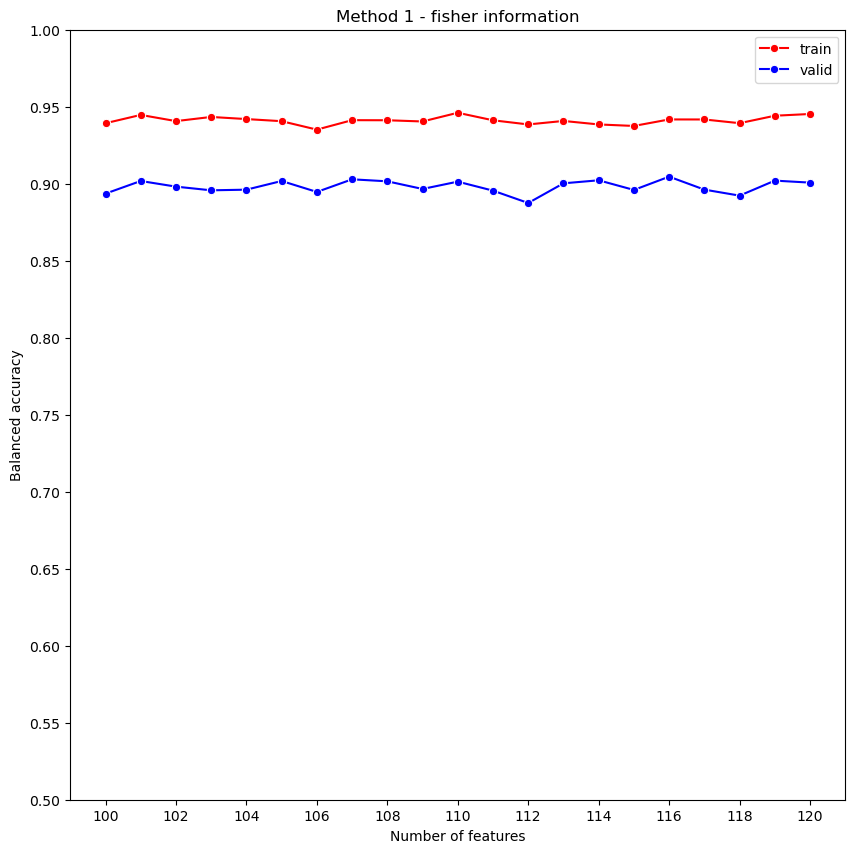

In [38]:
ffss = list(range(100, 121, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method1/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 1 - fisher information")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 2

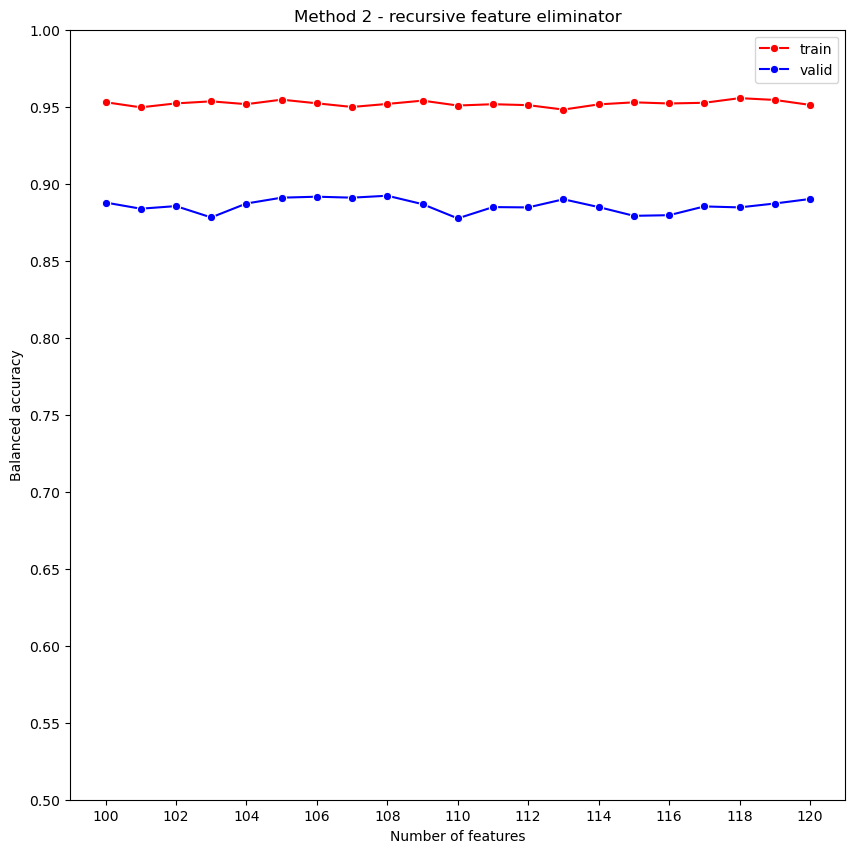

In [173]:
ffss = list(range(100, 121, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method2/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 2 - recursive feature eliminator")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 3

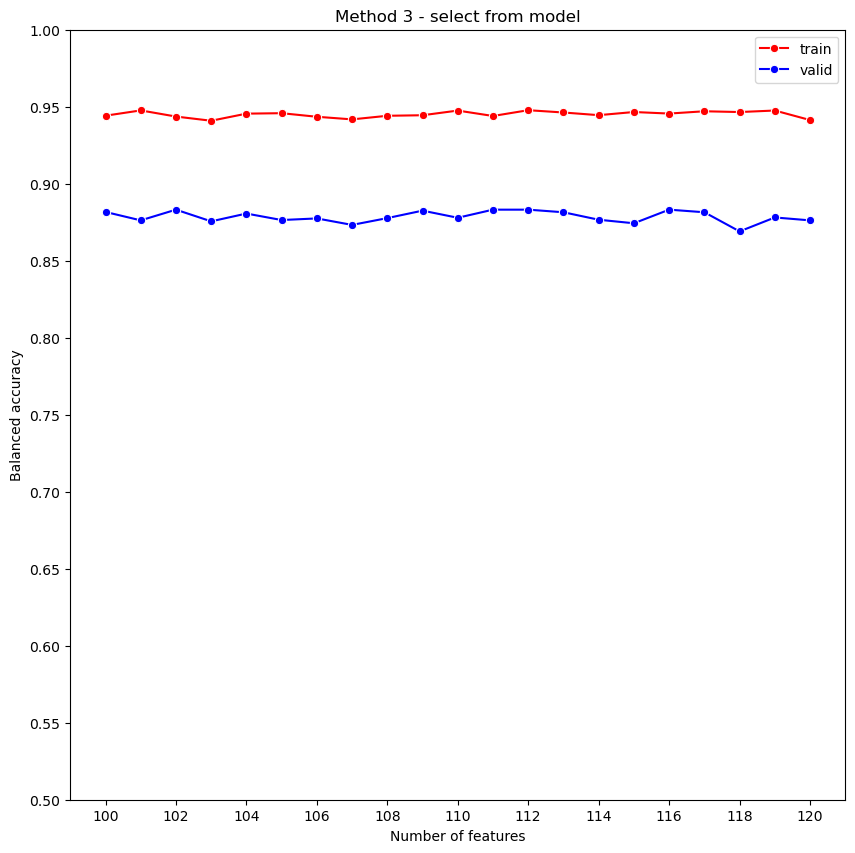

In [174]:
ffss = list(range(100, 121, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method3/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 3 - select from model")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 4

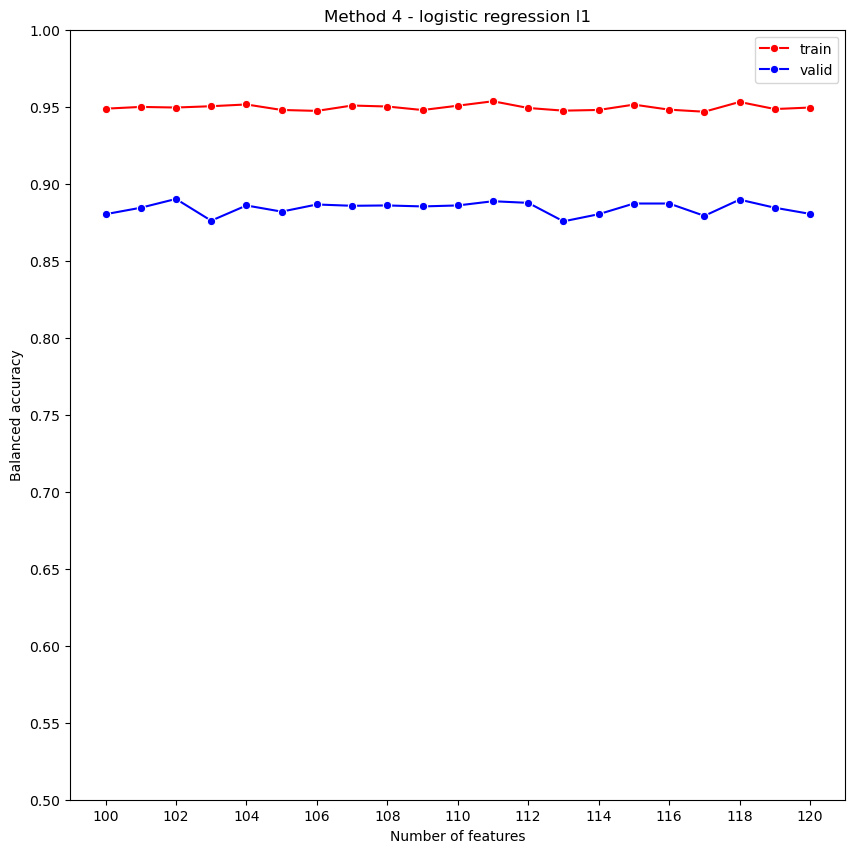

In [175]:
ffss = list(range(100, 121, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method4/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 4 - logistic regression l1")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

# Select best model

In [41]:
ffss = list(range(100, 121, 1))
iters = 3

b_accuracies_train = []
b_accuracies_test = []
methods = [f"{el}{i+1}" for i, el in enumerate(["method"] * 4)]

for method in methods:
    for j, ffs in enumerate(ffss):
        b_accuracies_train.append([])
        b_accuracies_test.append([])
        for i in range(iters):
            with open(f"output/spam/{method}/MACCHY_spam_features_{ffs}_{i}.txt") as f:
                columns = [line.rstrip() for line in f]
                X_train_t = X_train.loc[:, columns]
                X_valid_t = X_valid.loc[:, columns]

                xgb = XGBClassifier()
                xgb.fit(X_train_t, y_train)
                if (b_acc := balanced_accuracy_score(y_valid, xgb.predict(X_valid_t))) >= 0.92:
                    print(f"METHOD: {method}, FEATURES: {ffs}, ITER: {i}, B_ACC: {b_acc}, COLUMNS: {X_train_t.columns.values}")

METHOD: method2, FEATURES: 105, ITER: 2, B_ACC: 0.9219693059085133, COLUMNS: ['anything' 'anytime' 'apply' 'ard' 'ask' 'attempt' 'auction' 'await'
 'award' 'bed' 'bill' 'call' 'caller' 'camcorder' 'camera' 'card' 'cash'
 'chance' 'charge' 'chat' 'claim' 'club' 'code' 'come' 'contact' 'cos'
 'cost' 'date' 'draw' 'every' 'expire' 'fantasy' 'feel' 'fine' 'free'
 'friend' 'game' 'go' 'goin' 'good' 'guarantee' 'haha' 'hand' 'hav' 'hot'
 'huh' 'ill' 'join' 'land' 'landline' 'later' 'leave' 'like' 'log' 'make'
 'many' 'message' 'mins' 'mob' 'mobile' 'music' 'need' 'network' 'new'
 'night' 'noe' 'nokia' 'number' 'per' 'phone' 'please' 'pmin' 'pmsg'
 'pobox' 'pound' 'ppm' 'prize' 'receive' 'reply' 'say' 'send' 'service'
 'sms' 'stop' 'sure' 'take' 'term' 'text' 'think' 'tone' 'tonight' 'try'
 'txt' 'txts' 'unsubscribe' 'urgent' 'valid' 'video' 'visit' 'vouchers'
 'welcome' 'win' 'winner' 'wkly' 'word']
METHOD: method2, FEATURES: 115, ITER: 2, B_ACC: 0.9219693059085133, COLUMNS: ['amp' 'another'

In [42]:
X_train_final = X.loc[:, ['anything', 'anytime', 'apply', 'ard', 'ask', 'attempt', 'auction', 'await', 'award', 'bed',
                          'bill', 'call', 'caller', 'camcorder', 'camera', 'card', 'cash', 'chance', 'charge', 'chat',
                          'claim', 'club', 'code', 'come', 'contact', 'cos', 'cost', 'date', 'draw', 'every', 'expire',
                          'fantasy', 'feel', 'fine', 'free', 'friend', 'game', 'go', 'goin', 'good', 'guarantee', 'haha',
                          'hand', 'hav', 'hot', 'huh', 'ill', 'join', 'land', 'landline', 'later', 'leave', 'like', 'log',
                          'make', 'many', 'message', 'mins', 'mob', 'mobile', 'music', 'need', 'network', 'new', 'night',
                          'noe', 'nokia', 'number', 'per', 'phone', 'please', 'pmin', 'pmsg', 'pobox', 'pound', 'ppm', 
                          'prize', 'receive', 'reply', 'say', 'send', 'service', 'sms', 'stop', 'sure', 'take', 'term',
                          'text', 'think', 'tone', 'tonight', 'try', 'txt', 'txts', 'unsubscribe', 'urgent', 'valid',
                          'video', 'visit', 'vouchers', 'welcome', 'win', 'winner', 'wkly', 'word']]
X_test_final = tfidf_test.loc[:, ['anything', 'anytime', 'apply', 'ard', 'ask', 'attempt', 'auction', 'await', 'award', 'bed',
                          'bill', 'call', 'caller', 'camcorder', 'camera', 'card', 'cash', 'chance', 'charge', 'chat',
                          'claim', 'club', 'code', 'come', 'contact', 'cos', 'cost', 'date', 'draw', 'every', 'expire',
                          'fantasy', 'feel', 'fine', 'free', 'friend', 'game', 'go', 'goin', 'good', 'guarantee', 'haha',
                          'hand', 'hav', 'hot', 'huh', 'ill', 'join', 'land', 'landline', 'later', 'leave', 'like', 'log',
                          'make', 'many', 'message', 'mins', 'mob', 'mobile', 'music', 'need', 'network', 'new', 'night',
                          'noe', 'nokia', 'number', 'per', 'phone', 'please', 'pmin', 'pmsg', 'pobox', 'pound', 'ppm', 
                          'prize', 'receive', 'reply', 'say', 'send', 'service', 'sms', 'stop', 'sure', 'take', 'term',
                          'text', 'think', 'tone', 'tonight', 'try', 'txt', 'txts', 'unsubscribe', 'urgent', 'valid',
                          'video', 'visit', 'vouchers', 'welcome', 'win', 'winner', 'wkly', 'word']]

xgb.fit(X_train_final, y)

pd.DataFrame(xgb.predict_proba(X_test_final)).to_csv("output/spam/final/MACCHY_spam_prediction.txt", index=None)
np.savetxt("output/spam/final/MACCHY_spam_features.txt", X_test_final.columns.values, fmt="%s")